# Profit prediction with population of city(univariable_linear_regression)

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import style

In [86]:
# step 1 load data set
df=pd.read_csv('ex1data1.txt',names=['population','profit'])
df.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


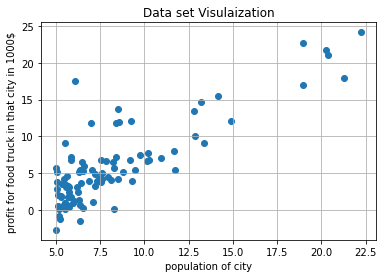

In [87]:
# step 2 visulize data set and think for algorithm
plt.scatter(df['population'],df['profit'])
plt.title('Data set Visulaization')
plt.xlabel('population of city')
plt.grid()
plt.ylabel('profit for food truck in that city in 1000$')
plt.show()

# since one varible seem like straight line so linear regression with one variable can be used
#  find cost function  with theta zero
#  then find value of theta so that cost function minimum
#  check for cost function with iteration
#  if all find draw hypothesis function with x-axis range
#  predict value

In [88]:
# declaring n,m,x,y,theta
data_np=df.values
data_np
# print(y)
theta=np.zeros((2,1))
m=df.shape[0] # no. of example dataset
n=df.shape[1]+1 # no. of feature
x=np.ones((m,1))
temp=data_np[:,0].reshape((m,1))
# print(temp)
x=np.hstack((x,temp))
y=np.array(data_np[:,1].reshape((m,1)))

print(x.dtype)
print(x.shape)
theta

float64
(97, 2)


array([[0.],
       [0.]])

# Cost function

In [89]:
#     requirement theta vector ,x(1,population) vector, y vector(profit)
#     j=1/2m(summation((h-y)^2))
#     h=x*theta(matrix multiplication) x.dot(theta)

def cost_funtion(x,y,theta):       # x,y,theta---> np array
    hypo=x.dot(theta)
    diff=(hypo-y)**2
    return (1/(2*m))*np.sum(diff)





In [90]:

cur_val=cost_funtion(x,y,theta)
print(cur_val)
theta
# since value is 32 now we have to minimize it
#  instead of advance algo we using gradient descent next time adv. algo with scipy

32.072733877455676


array([[0.],
       [0.]])

# Gradient descent
###### return theta_values , value of j with theta

In [91]:

J_with_theta=[]

def gradient_descent(theta,alpha,m,x,y,iteration):
    
    for i in range(iteration):
        
        theta-=(alpha/m)*(np.transpose(x).dot((np.dot(x, theta) - y)))
        J_with_theta.append(cost_funtion(x, y, theta))

    return theta, J_with_theta


In [92]:
# print(theta)
theta,J_value_theta=gradient_descent(theta,0.01,m,x,y,1500)
theta


array([[-3.63029144],
       [ 1.16636235]])

# 3d Plot J vs thetas

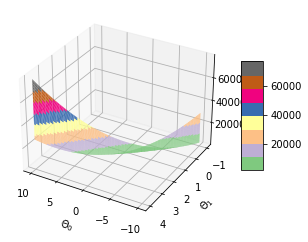

In [119]:
from mpl_toolkits.mplot3d import Axes3D
#  pasted code no idea about 3d 

#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=cost_funtion(x,y,t)

        
#Generating the surface plot

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="Accent")

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("J")

#rotate for better angle
ax.view_init(30,120)

# Testing for right value of alpha

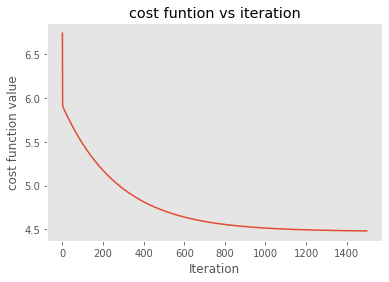

In [151]:
#  j vs iteration

plt.plot(J_value_theta)
style.use("ggplot")
plt.grid()
plt.title("cost funtion vs iteration")
plt.xlabel('Iteration')
plt.ylabel('cost function value')
plt.show()

# Building Best model

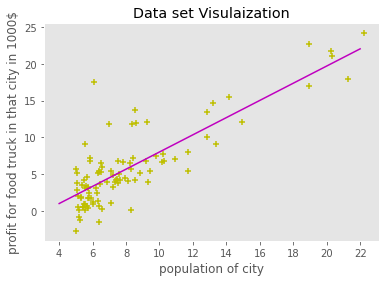

In [153]:
plt.scatter(df['population'],df['profit'],marker='+',color='y')
plt.title('Data set Visulaization')
plt.xlabel('population of city')
plt.xticks(np.arange(4, 25, step=2))
plt.grid()
plt.ylabel('profit for food truck in that city in 1000$')


t=[i for i in range(4,24,2)]
YY=[theta[0,0]+theta[1,0]*i for i in t]
plt.plot(t,YY,color='m')
plt.show()

# Prediction non given value

In [154]:
def prediction(popula):
    return theta[0,0]+theta[1,0]*popula

In [155]:
print(prediction(30))

31.3605790706631


In [156]:
print(prediction(4.1))

1.1517941969715255
